<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Count_Misssing%20value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [ ]:
df.head()

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


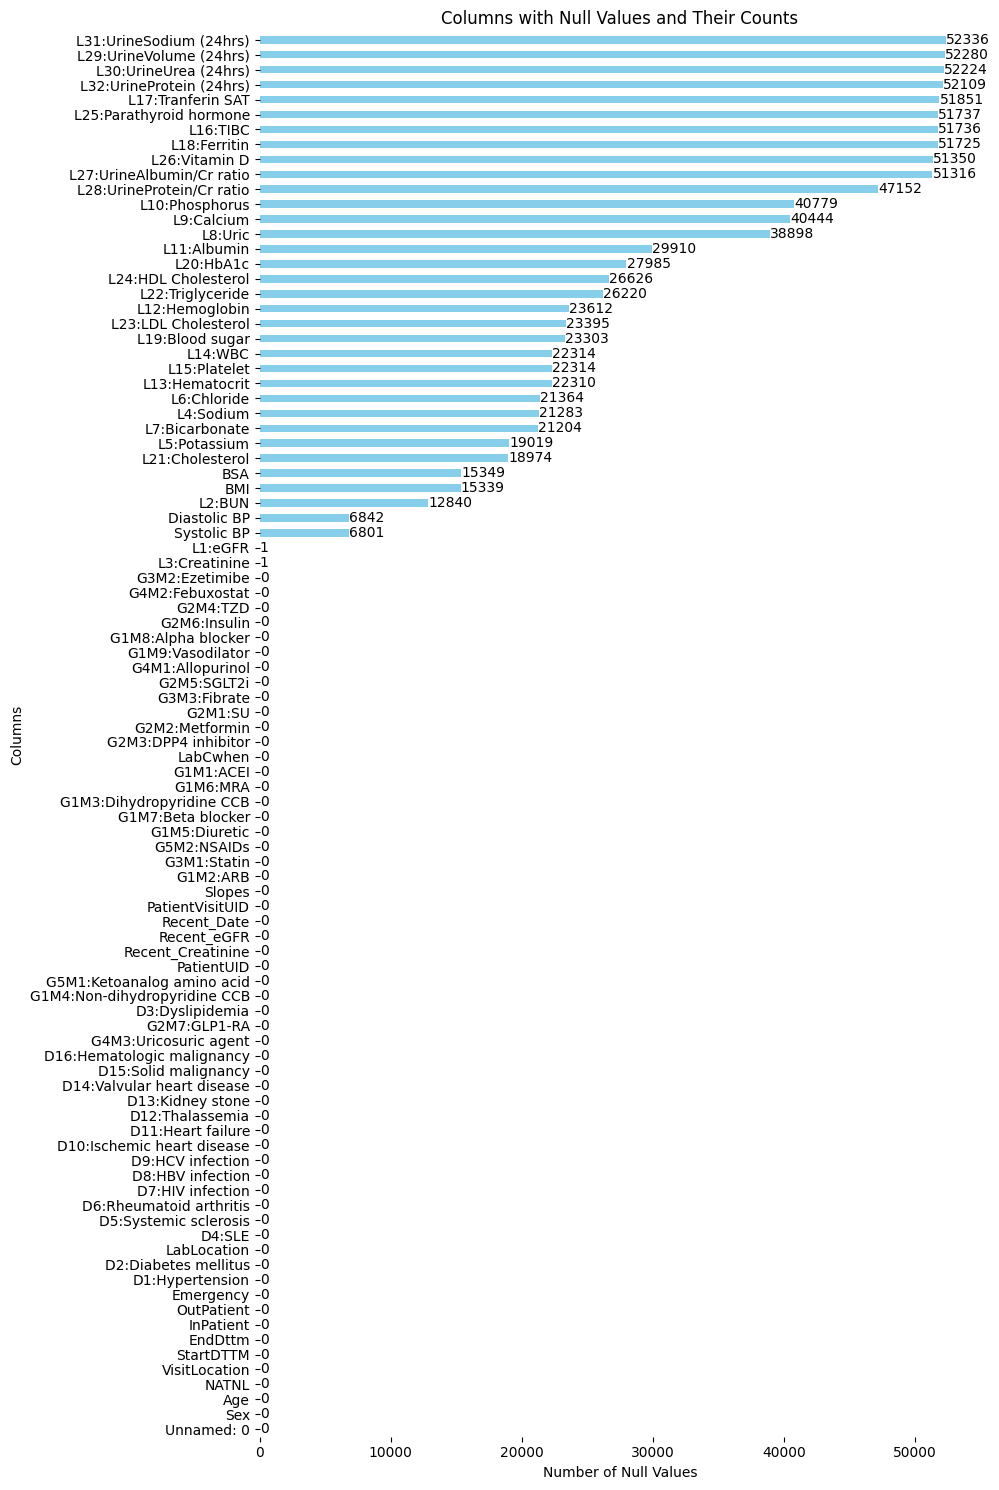

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

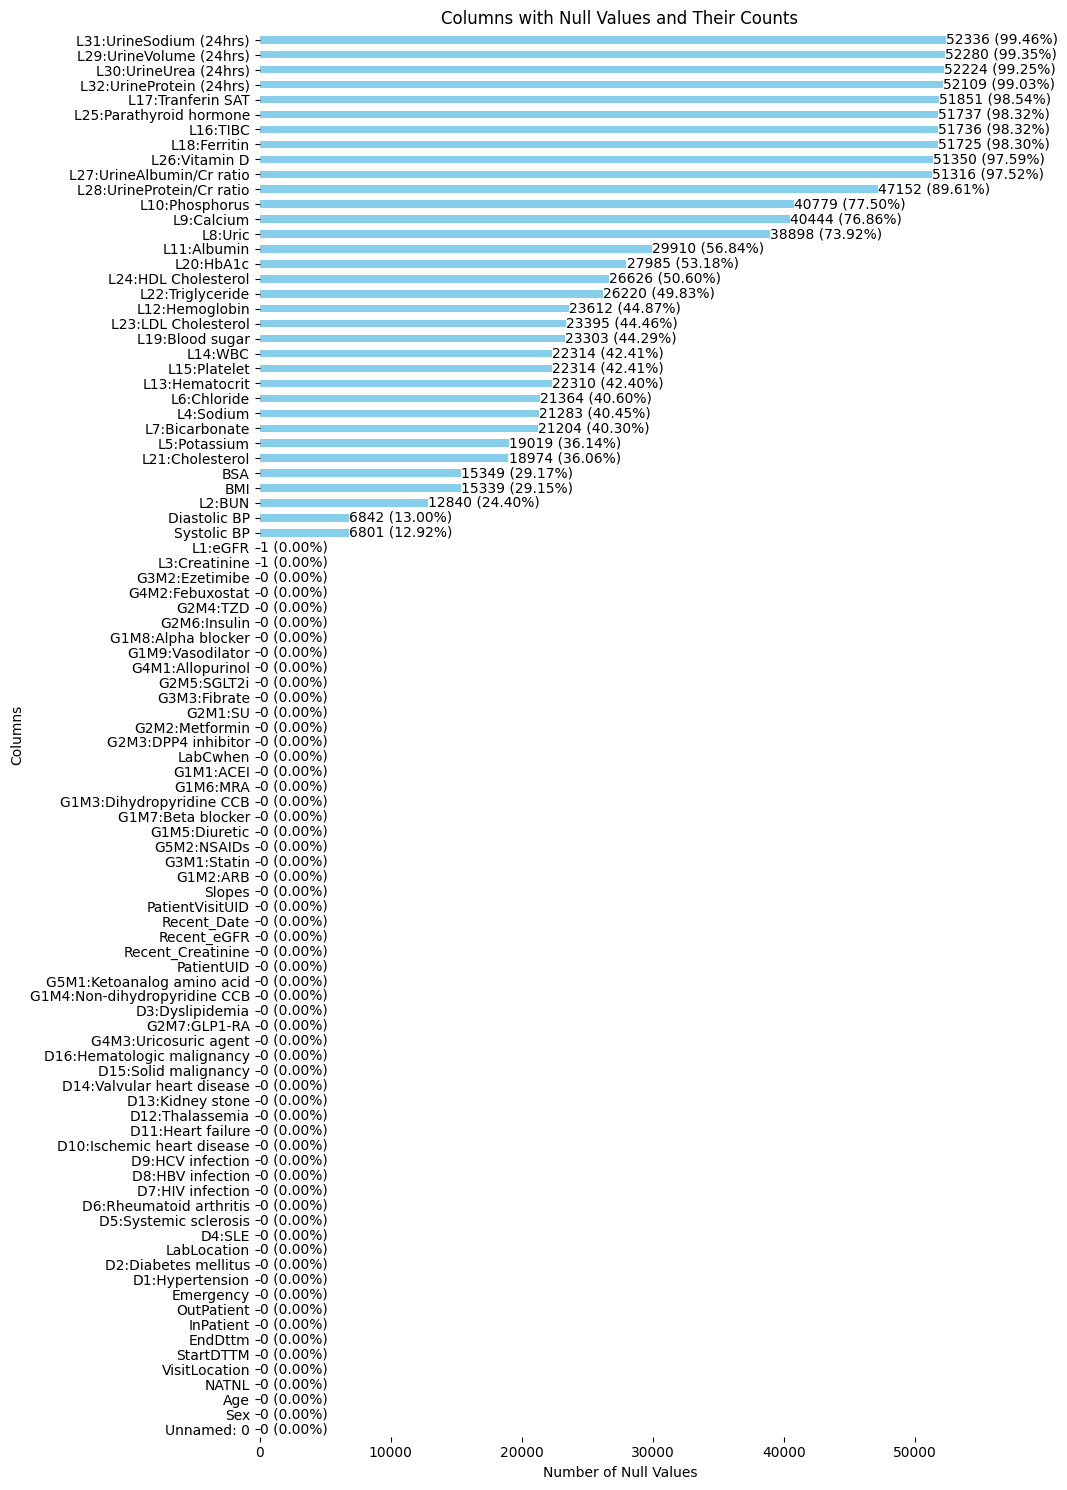

In [6]:
null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()

total_records = len(df)
null_percentage = (null_count_sorted / total_records) * 100

plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, f"{v} ({null_percentage.iloc[i]:.2f}%)", color='black', va='center')

plt.show()

In [ ]:
df.shape

(52620, 94)

In [ ]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "Unnamed: 0" และ "PatientUID"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin(["Unnamed: 0", "PatientUID", "Slopes"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
data = df[missing_columns]
data.head()

,Unnamed: 0,PatientUID,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,0,924852,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,989278,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2103792,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,953611,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,488150,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [ ]:
data.shape #คอลัมน์ที่มีค่าว่าง 36 คอลัมน์

(52620, 39)

In [ ]:
data.columns

Index(['Unnamed: 0', 'PatientUID', 'Slopes', 'BMI', 'BSA', 'Diastolic BP',
       'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium',
       'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
      dtype='object')

##แบ่งระยะโรคไตตามค่า eGFR 5 ระยะ
* ระยะที่ 1 มีค่า > 90 ขึ้นไป
* ระยะที่ 2  มีค่าอยู่ระหว่าง 89-60
* ระยะที่ 3  มีค่าอยุ๋ระหว่าง 59-30
* ระยะที่ 4 มีค่าอยู่ระหว่าง 29-15
* ระยะที่ 5 มีค่า <15 ลงไป



In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'L1:eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value > 90:
        return 'ระยะที่ 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'ระยะที่ 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'ระยะที่ 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'ระยะที่ 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'ระยะที่ 4'
    else:
        return 'ระยะที่ 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'L1:eGFR'
data['eGFR_Category'] = data['L1:eGFR'].apply(categorize_eGFR)
data

<ipython-input-9-df13ffd71699>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eGFR_Category'] = data['L1:eGFR'].apply(categorize_eGFR)


,Unnamed: 0,PatientUID,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_Category
0,0,924852,2.754717,NaN,NaN,53.0,131.0,13.00,NaN,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 5
1,1,989278,-46.720000,18.71,1.70,71.0,121.0,80.30,5.2,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 2
2,2,2103792,11.018868,23.56,1.47,93.0,143.0,44.70,22.6,1.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3b
3,3,953611,17.222520,27.50,1.41,60.0,120.0,33.50,28.9,1.50,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3b
4,4,488150,-79.002653,NaN,NaN,NaN,NaN,114.20,NaN,0.70,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ระยะที่ 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,-4.929870,NaN,NaN,NaN,NaN,73.30,25.0,1.06,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 2
52616,52616,43763,16.017287,35.26,2.03,66.0,147.0,68.10,24.8,1.12,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 2
52617,52617,43763,-24.861814,NaN,NaN,NaN,NaN,84.60,17.8,0.93,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 2
52618,52618,43763,4.558175,NaN,NaN,NaN,NaN,56.06,23.8,1.30,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3a


In [ ]:
data.columns

Index(['Unnamed: 0', 'PatientUID', 'Slopes', 'BMI', 'BSA', 'Diastolic BP',
       'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium',
       'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)', 'eGFR_Category'],
      dtype='object')

In [ ]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes','L1:eGFR','eGFR_Category' มาอยู่ด้านหน้า
column_order = ['Unnamed: 0', 'PatientUID', 'Slopes', 'L1:eGFR', 'eGFR_Category'] + [col for col in data.columns if col not in ['Unnamed: 0', 'PatientUID', 'Slopes', 'L1:eGFR', 'eGFR_Category']]
data1 = data[column_order]
data1

,Unnamed: 0,PatientUID,Slopes,L1:eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,0,924852,2.754717,13.00,ระยะที่ 5,NaN,NaN,53.0,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,989278,-46.720000,80.30,ระยะที่ 2,18.71,1.70,71.0,121.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2103792,11.018868,44.70,ระยะที่ 3b,23.56,1.47,93.0,143.0,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,953611,17.222520,33.50,ระยะที่ 3b,27.50,1.41,60.0,120.0,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,488150,-79.002653,114.20,ระยะที่ 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,-4.929870,73.30,ระยะที่ 2,NaN,NaN,NaN,NaN,25.0,...,122.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52616,52616,43763,16.017287,68.10,ระยะที่ 2,35.26,2.03,66.0,147.0,24.8,...,101.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,52617,43763,-24.861814,84.60,ระยะที่ 2,NaN,NaN,NaN,NaN,17.8,...,113.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,52618,43763,4.558175,56.06,ระยะที่ 3a,NaN,NaN,NaN,NaN,23.8,...,112.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# นับจำนวนข้อมูลแต่ละระดับของ 'eGFR_Category'
eGFR_count = data['eGFR_Category'].value_counts()

# สร้าง DataFrame จาก Series ของ eGFR_count
df_eGFR_count = pd.DataFrame({'Count': eGFR_count})

# เพิ่มคอลัมน์ 'eGFR_Category' จาก index
df_eGFR_count['eGFR_Category'] = df_eGFR_count.index

# สลับตำแหน่งคอลัมน์ 'eGFR_Category' ขึ้นไปอยู่ที่ตำแหน่งแรกของ DataFrame
df_eGFR_count = df_eGFR_count[['eGFR_Category', 'Count']]

# จัดลำดับ DataFrame ตาม 'eGFR_Category'
df_eGFR_count_sorted = df_eGFR_count.sort_values(by='eGFR_Category').reset_index(drop=True)

# แสดง DataFrame ที่เรียงลำดับตาม 'eGFR_Category' และมี 'eGFR_Category' ขึ้นก่อน
df_eGFR_count_sorted

,eGFR_Category,Count
0,ระยะที่ 1,1759
1,ระยะที่ 2,19996
2,ระยะที่ 3a,19036
3,ระยะที่ 3b,8348
4,ระยะที่ 4,2684
5,ระยะที่ 5,797


##ระยะที่ 1

In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 1'
stage1 = data1[data1['eGFR_Category'] == 'ระยะที่ 1']
stage1 # 1759 rows

,Unnamed: 0,PatientUID,Slopes,L1:eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
4,4,488150,-79.002653,114.20,ระยะที่ 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
71,71,2299213,-60.026066,125.20,ระยะที่ 1,NaN,NaN,68.0,92.0,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91,2314499,-35.353403,108.40,ระยะที่ 1,NaN,NaN,71.0,110.0,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,93,1407655,-11.244949,126.90,ระยะที่ 1,NaN,NaN,71.0,94.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,108,565239,-44.397098,101.30,ระยะที่ 1,25.70,1.84,74.0,129.0,13.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52606,52606,2180110,-9.147643,128.60,ระยะที่ 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52607,52607,2180110,6.725197,118.50,ระยะที่ 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
52608,52608,2180110,-4.828042,125.52,ระยะที่ 1,23.81,1.78,71.0,138.0,12.5,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
52609,52609,2180110,-14.127763,120.52,ระยะที่ 1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN


In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage1_missing = stage1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage1_missing / len(stage1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing1 = pd.DataFrame({
    'Stage1_Missing Values': stage1_missing,
    'Stage1_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing1

,Stage1_Missing Values,Stage1_Missing Values (%)
Unnamed: 0,0,0.00
PatientUID,0,0.00
Slopes,0,0.00
L1:eGFR,0,0.00
eGFR_Category,0,0.00
BMI,591,33.60
BSA,591,33.60
Diastolic BP,182,10.35
Systolic BP,183,10.40
L2:BUN,398,22.63


In [ ]:
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage1_missing_values_only = missing1[missing1['Stage1_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage1_missing_values_only

,Stage1_Missing Values,Stage1_Missing Values (%)
BMI,591,33.60
BSA,591,33.60
Diastolic BP,182,10.35
Systolic BP,183,10.40
L2:BUN,398,22.63
L4:Sodium,617,35.08
L5:Potassium,556,31.61
L6:Chloride,617,35.08
L7:Bicarbonate,616,35.02
L8:Uric,1484,84.37


##ระยะที่ 2

In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 2'
stage2 = data1[data1['eGFR_Category'] == 'ระยะที่ 2']
stage2 # 19996

,Unnamed: 0,PatientUID,Slopes,L1:eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
1,1,989278,-46.720000,80.30,ระยะที่ 2,18.71,1.70,71.0,121.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,1634987,-13.117188,69.70,ระยะที่ 2,25.39,1.68,61.0,119.0,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,2261796,3.920716,64.60,ระยะที่ 2,24.89,1.50,59.0,103.0,15.9,...,63.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,622412,4.777487,73.10,ระยะที่ 2,22.49,1.75,92.0,160.0,11.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,2218117,-29.344913,84.90,ระยะที่ 2,NaN,NaN,NaN,NaN,6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,52614,43763,-9.146778,83.80,ระยะที่ 2,NaN,NaN,78.0,137.0,15.3,...,113.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52615,52615,43763,-4.929870,73.30,ระยะที่ 2,NaN,NaN,NaN,NaN,25.0,...,122.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52616,52616,43763,16.017287,68.10,ระยะที่ 2,35.26,2.03,66.0,147.0,24.8,...,101.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,52617,43763,-24.861814,84.60,ระยะที่ 2,NaN,NaN,NaN,NaN,17.8,...,113.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage2_missing = stage2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage2_missing / len(stage2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing2 = pd.DataFrame({
    'Stage2_Missing Values': stage2_missing,
    'Stage2_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing2

,Stage2_Missing Values,Stage2_Missing Values (%)
Unnamed: 0,0,0.00
PatientUID,0,0.00
Slopes,0,0.00
L1:eGFR,0,0.00
eGFR_Category,0,0.00
BMI,5472,27.37
BSA,5471,27.36
Diastolic BP,2615,13.08
Systolic BP,2596,12.98
L2:BUN,5683,28.42


In [ ]:
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage2_missing_values_only = missing2[missing2['Stage2_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage2_missing_values_only

,Stage2_Missing Values,Stage2_Missing Values (%)
BMI,5472,27.37
BSA,5471,27.36
Diastolic BP,2615,13.08
Systolic BP,2596,12.98
L2:BUN,5683,28.42
L4:Sodium,9481,47.41
L5:Potassium,8458,42.30
L6:Chloride,9518,47.60
L7:Bicarbonate,9460,47.31
L8:Uric,15448,77.26


##ระยะที่ 3a

In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 3'
stage3a = data1[data1['eGFR_Category'] == 'ระยะที่ 3a']
stage3a.shape

(19036, 40)

In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage3a_missing = stage3a.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage3a_missing / len(stage3a)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing3a = pd.DataFrame({
    'Stage3a_Missing Values': stage3a_missing,
    'Stage3a_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage3a_missing_values_only = missing3a[missing3a['Stage3a_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage3a_missing_values_only

,Stage3a_Missing Values,Stage3a_Missing Values (%)
BMI,5406,28.40
BSA,5413,28.44
Diastolic BP,2590,13.61
Systolic BP,2580,13.55
L2:BUN,4793,25.18
L4:Sodium,8089,42.49
L5:Potassium,7221,37.93
L6:Chloride,8111,42.61
L7:Bicarbonate,8059,42.34
L8:Uric,13800,72.49


##ระยะที่ 3b

In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 3'
stage3b = data1[data1['eGFR_Category'] == 'ระยะที่ 3b']
stage3b.shape

(8348, 40)

In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage3b_missing = stage3b.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage3b_missing / len(stage3b)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing3b = pd.DataFrame({
    'Stage3b_Missing Values': stage3b_missing,
    'Stage3b_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage3b_missing_values_only = missing3b[missing3b['Stage3b_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage3b_missing_values_only

,Stage3b_Missing Values,Stage3b_Missing Values (%)
BMI,2650,31.74
BSA,2653,31.78
Diastolic BP,1039,12.45
Systolic BP,1029,12.33
L2:BUN,1651,19.78
L4:Sodium,2522,30.21
L5:Potassium,2259,27.06
L6:Chloride,2533,30.34
L7:Bicarbonate,2503,29.98
L8:Uric,5882,70.46


##ระยะที่ 4

In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 4'
stage4 = data1[data1['eGFR_Category'] == 'ระยะที่ 4']
stage4.shape

(2684, 40)

In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage4_missing = stage4.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage4_missing / len(stage4)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing4 = pd.DataFrame({
    'Stage4_Missing Values': stage4_missing,
    'Stage4_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage4_missing_values_only = missing4[missing4['Stage4_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage4_missing_values_only

,Stage4_Missing Values,Stage4_Missing Values (%)
BMI,895,33.35
BSA,895,33.35
Diastolic BP,308,11.48
Systolic BP,307,11.44
L2:BUN,290,10.80
L4:Sodium,498,18.55
L5:Potassium,457,17.03
L6:Chloride,509,18.96
L7:Bicarbonate,497,18.52
L8:Uric,1751,65.24


#ระยะที่ 5

In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 5'
stage5 = data1[data1['eGFR_Category'] == 'ระยะที่ 5']
stage5.shape

(797, 40)

In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage5_missing = stage5.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage5_missing / len(stage5)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing5 = pd.DataFrame({
    'Stage5_Missing Values': stage5_missing,
    'Stage5_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
stage5_missing_values_only = missing5[missing5['Stage5_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
stage5_missing_values_only

,Stage5_Missing Values,Stage5_Missing Values (%)
L1:eGFR,1,0.13
BMI,325,40.78
BSA,326,40.90
Diastolic BP,108,13.55
Systolic BP,106,13.30
L2:BUN,25,3.14
L3:Creatinine,1,0.13
L4:Sodium,76,9.54
L5:Potassium,68,8.53
L6:Chloride,76,9.54


#สร้างตารางรวมทุกระยะ

In [ ]:
# สร้างตารางที่รวมกันแนวคอลัมน์
combined_missing_values = pd.concat([
    stage1_missing_values_only,
    stage2_missing_values_only,
    stage3a_missing_values_only,
    stage3b_missing_values_only,
    stage4_missing_values_only,
    stage5_missing_values_only
], axis=1)

# แสดงผลลัพธ์ของตารางที่รวมกัน
combined_missing_values

,Stage1_Missing Values,Stage1_Missing Values (%),Stage2_Missing Values,Stage2_Missing Values (%),Stage3a_Missing Values,Stage3a_Missing Values (%),Stage3b_Missing Values,Stage3b_Missing Values (%),Stage4_Missing Values,Stage4_Missing Values (%),Stage5_Missing Values,Stage5_Missing Values (%)
BMI,591.0,33.60,5472.0,27.37,5406.0,28.40,2650.0,31.74,895.0,33.35,325,40.78
BSA,591.0,33.60,5471.0,27.36,5413.0,28.44,2653.0,31.78,895.0,33.35,326,40.90
Diastolic BP,182.0,10.35,2615.0,13.08,2590.0,13.61,1039.0,12.45,308.0,11.48,108,13.55
Systolic BP,183.0,10.40,2596.0,12.98,2580.0,13.55,1029.0,12.33,307.0,11.44,106,13.30
L2:BUN,398.0,22.63,5683.0,28.42,4793.0,25.18,1651.0,19.78,290.0,10.80,25,3.14
L4:Sodium,617.0,35.08,9481.0,47.41,8089.0,42.49,2522.0,30.21,498.0,18.55,76,9.54
L5:Potassium,556.0,31.61,8458.0,42.30,7221.0,37.93,2259.0,27.06,457.0,17.03,68,8.53
L6:Chloride,617.0,35.08,9518.0,47.60,8111.0,42.61,2533.0,30.34,509.0,18.96,76,9.54
L7:Bicarbonate,616.0,35.02,9460.0,47.31,8059.0,42.34,2503.0,29.98,497.0,18.52,69,8.66
L8:Uric,1484.0,84.37,15448.0,77.26,13800.0,72.49,5882.0,70.46,1751.0,65.24,533,66.88


#แบ่งตามค่า slope

โดยแบ่งออกเป็น
* slope1 คือ >-0.5
* slope2 คือ <=-0.5



In [ ]:
df

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.80,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.30,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.90,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.10,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.60,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,1.30,55.28,2566-04-10 15:34:20.643,4553420,-4.929870,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2560-10-05 08:55:06.223
52616,52616,43763,1.30,55.28,2566-04-10 15:34:20.643,5674644,16.017287,0,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2561-10-25 09:43:02.440
52617,52617,43763,1.30,55.28,2566-04-10 15:34:20.643,6817059,-24.861814,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2562-11-06 09:08:22.770
52618,52618,43763,1.30,55.28,2566-04-10 15:34:20.643,8004571,4.558175,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2563-12-29 10:39:32.263


In [ ]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
slope = df[missing_columns]
slope.head() #36 คอลัมน์ที่มีค่าว่าง

,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตาม Slopes
def categorize_slope(slope):
    if slope >-0.5:
        return 'slope1'
    else:
        return 'slope2'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
slope['slope_Category'] = slope['Slopes'].apply(categorize_slope)
slope.head()

<ipython-input-90-d0bea8590f13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slope['slope_Category'] = slope['Slopes'].apply(categorize_slope)


,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),slope_Category
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope2
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,slope1
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,slope2


In [ ]:
#เรียงให้คอลัมน์  'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'slope_Category','Recent_eGFR'] + [col for col in slope.columns if col not in ['PatientUID', 'Slopes', 'slope_Category','Recent_eGFR']]
slope = slope[column_order]
slope.head()

,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,2.754717,slope1,15.8,NaN,NaN,53.0,131.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,-46.720000,slope2,32.3,18.71,1.70,71.0,121.0,80.3,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,11.018868,slope1,55.9,23.56,1.47,93.0,143.0,44.7,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,17.222520,slope1,51.1,27.50,1.41,60.0,120.0,33.5,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,-79.002653,slope2,32.6,NaN,NaN,NaN,NaN,114.2,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [ ]:
# คำนวณเปอร์เซ็นต์ของค่าว่างทั้งหมดแยกตาม 'eGFR_Category'
missing_by_category = slope.groupby('slope_Category').apply(lambda x: round(x.isnull().mean().mean() * 100, 2))
missing_by_category

slope_Category
slope1    51.93
slope2    51.92
dtype: float64

In [ ]:
#จากน้อยไปมาก
slope_sort = slope.sort_values(by='Slopes', ascending=True)
slope_sort.head()

,PatientUID,Slopes,slope_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
4,488150,-79.002653,slope2,32.60,NaN,NaN,NaN,NaN,114.20,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
51584,1139621,-74.927423,slope2,25.44,NaN,NaN,77.0,185.0,95.40,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,515952,-68.120823,slope2,75.50,NaN,NaN,60.0,113.0,125.20,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40820,2136999,-67.941878,slope2,17.01,24.22,1.81,76.0,150.0,101.98,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48577,1582107,-67.405779,slope2,24.08,20.80,1.70,86.0,141.0,77.80,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'slope_Category' เป็น 'slope1	'
slope_1 = slope_sort[slope_sort['slope_Category'] == 'slope1']
slope_1.shape

(22247, 40)

In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
slope_1_missing = slope_1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * slope_1_missing / len(slope_1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing_1 = pd.DataFrame({
    'Slope_1_Missing Values': slope_1_missing,
    'Slope_1_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
slope_1_missing_values_only = missing_1[missing_1['Slope_1_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
slope_1_missing_values_only

,Slope_1_Missing Values,Slope_1_Missing Values (%)
BMI,6542,29.41
BSA,6545,29.42
Diastolic BP,3001,13.49
Systolic BP,2980,13.40
L1:eGFR,1,0.00
L2:BUN,5361,24.10
L3:Creatinine,1,0.00
L4:Sodium,8893,39.97
L5:Potassium,7982,35.88
L6:Chloride,8928,40.13


In [ ]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'slope_Category' เป็น 'slope1	'
slope_2 = slope_sort[slope_sort['slope_Category'] == 'slope2']
slope_2.shape

(30373, 40)

In [ ]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
slope_2_missing = slope_2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * slope_2_missing / len(slope_2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing_2 = pd.DataFrame({
    'Slope_2_Missing Values': slope_2_missing,
    'Slope_2_Missing Values (%)': missing_percent.round(2)  # ปัดทศนิยมในคอลัมน์ 'Missing Values (%)' เป็น 2 ตำแหน่ง
})
# สร้างตัวแปรเพื่อเก็บเฉพาะค่าว่าง
slope_2_missing_values_only = missing_2[missing_2['Slope_2_Missing Values'] > 0]

# แสดงผลลัพธ์ DataFrame ที่เก็บเฉพาะค่าว่าง
slope_2_missing_values_only

,Slope_2_Missing Values,Slope_2_Missing Values (%)
BMI,8797,28.96
BSA,8804,28.99
Diastolic BP,3841,12.65
Systolic BP,3821,12.58
L2:BUN,7479,24.62
L4:Sodium,12390,40.79
L5:Potassium,11037,36.34
L6:Chloride,12436,40.94
L7:Bicarbonate,12355,40.68
L8:Uric,22538,74.20


In [ ]:
# สร้างตารางที่รวมกันแนวคอลัมน์
combined_missing_values_slope = pd.concat([
    slope_1_missing_values_only,
    slope_2_missing_values_only
], axis=1)

# แสดงผลลัพธ์ของตารางที่รวมกัน
combined_missing_values_slope

,Slope_1_Missing Values,Slope_1_Missing Values (%),Slope_2_Missing Values,Slope_2_Missing Values (%)
BMI,6542,29.41,8797.0,28.96
BSA,6545,29.42,8804.0,28.99
Diastolic BP,3001,13.49,3841.0,12.65
Systolic BP,2980,13.40,3821.0,12.58
L1:eGFR,1,0.00,NaN,NaN
L2:BUN,5361,24.10,7479.0,24.62
L3:Creatinine,1,0.00,NaN,NaN
L4:Sodium,8893,39.97,12390.0,40.79
L5:Potassium,7982,35.88,11037.0,36.34
L6:Chloride,8928,40.13,12436.0,40.94
